# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans ,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial.distance import cdist


In [316]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Data

In [317]:
df = pd.read_csv('/content/Traffic_Accidents.csv')


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [318]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [319]:
df.sample()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
42439,385851.0,439404.0,-2.216568,53.850674,4,3.0,1,1.0,23/01/2012,2,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2012


In [320]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [321]:
df.shape

(52000, 26)

In [322]:
df.duplicated().sum()

43

In [323]:
df.drop_duplicates()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [325]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [326]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [327]:
#df = df.drop(['Number_of_Casualties'], axis=1)

In [328]:
df_nu = df.drop(['Local_Authority_(Highway)','Road_Surface_Conditions','Road_Type','Date' , 'Pedestrian_Crossing-Human_Control' , 'Pedestrian_Crossing-Physical_Facilities'
 , 'Light_Conditions' , 'Weather_Conditions' ,'Did_Police_Officer_Attend_Scene_of_Accident'] , axis = 1)


In [329]:
df_nu.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,-0.426100,0.999358,-0.428100,-0.355791,0.011899,0.013283,-0.036557,-0.006266,-0.378165,-0.066523,-0.084217,-0.056254,0.045012,-0.003933,-0.087152,0.032600
Location_Northing_OSGR,-0.426100,1.000000,-0.436512,0.999974,0.176440,-0.030637,-0.041982,0.028132,0.001804,0.128939,0.036908,0.044823,0.045996,-0.034241,0.019856,0.050624,-0.011934
Longitude,0.999358,-0.436512,1.000000,-0.438409,-0.369331,0.012545,0.014655,-0.035299,-0.006195,-0.388518,-0.064988,-0.081901,-0.055575,0.045610,-0.002466,-0.085490,0.032355
Latitude,-0.428100,0.999974,-0.438409,1.000000,0.174347,-0.030641,-0.041782,0.028327,0.001804,0.127175,0.036912,0.045675,0.045712,-0.033955,0.020501,0.050162,-0.012018
Police_Force,-0.355791,0.176440,-0.369331,0.174347,1.000000,-0.033097,-0.015102,0.002525,0.004726,0.981991,0.047616,-0.006392,0.199189,-0.117069,-0.019011,0.237511,-0.031013
Accident_Severity,0.011899,-0.030637,0.012545,-0.030641,-0.033097,1.000000,0.079257,-0.100917,0.015712,-0.033040,0.019119,-0.010151,-0.074867,0.062850,0.024364,-0.080621,-0.007567
Number_of_Vehicles,0.013283,-0.041982,0.014655,-0.041782,-0.015102,0.079257,1.000000,0.267989,-0.005239,-0.009094,-0.139214,0.000460,0.080439,0.067722,0.027258,0.038217,-0.008036
Number_of_Casualties,-0.036557,0.028132,-0.035299,0.028327,0.002525,-0.100917,0.267989,1.000000,0.003392,0.010768,-0.082221,0.008200,0.140630,-0.032779,0.002640,0.118086,-0.014588
Day_of_Week,-0.006266,0.001804,-0.006195,0.001804,0.004726,0.015712,-0.005239,0.003392,1.000000,0.004856,0.008415,0.002395,-0.015010,0.003579,0.002457,-0.015958,-0.000973
Local_Authority_(District),-0.378165,0.128939,-0.388518,0.127175,0.981991,-0.033040,-0.009094,0.010768,0.004856,1.000000,0.058510,0.005139,0.205801,-0.116678,-0.017620,0.251190,-0.035152


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [330]:
for i in df.columns:
  print(df[i].value_counts())

Location_Easting_OSGR
531890.0    16
533650.0    15
531220.0    14
530980.0    13
533370.0    13
            ..
309450.0     1
575400.0     1
503208.0     1
457720.0     1
456682.0     1
Name: count, Length: 30693, dtype: int64
Location_Northing_OSGR
181190.0    19
181310.0    17
180920.0    15
179690.0    15
181110.0    14
            ..
310945.0     1
489909.0     1
150650.0     1
809700.0     1
127058.0     1
Name: count, Length: 32580, dtype: int64
Longitude
-0.100610    5
-0.096159    4
-0.570203    4
-2.948497    4
-0.044780    3
            ..
-5.307961    1
 0.036592    1
-1.505472    1
-1.612575    1
-1.212104    1
Name: count, Length: 50901, dtype: int64
Latitude
51.515721    5
53.211710    4
53.404118    4
51.570594    4
51.371165    3
            ..
54.017044    1
50.123692    1
51.544534    1
55.009095    1
51.565050    1
Name: count, Length: 50701, dtype: int64
Police_Force
1     7813
20    2047
6     2004
13    1925
43    1925
46    1644
44    1592
4     1557
50    1445


In [331]:
for i in df.columns:
  df[i] = df[i].fillna(df[i].mode()[0])

In [332]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [333]:
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-333-b9c6864122be>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [334]:
df['Date']

,Date
0,2009-11-27
1,2010-10-10
2,2005-09-14
3,2007-08-18
4,2013-08-06
...,...
51995,2012-08-31
51996,2013-05-08
51997,2011-11-01
51998,2011-07-22


In [335]:
df['Did_Police_Officer_Attend_Scene_of_Accident'] = df['Did_Police_Officer_Attend_Scene_of_Accident'].astype('bool')


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Location_Easting_OSGR                        52000 non-null  float64       
 1   Location_Northing_OSGR                       52000 non-null  float64       
 2   Longitude                                    52000 non-null  float64       
 3   Latitude                                     52000 non-null  float64       
 4   Police_Force                                 52000 non-null  int64         
 5   Accident_Severity                            52000 non-null  float64       
 6   Number_of_Vehicles                           52000 non-null  int64         
 7   Number_of_Casualties                         52000 non-null  float64       
 8   Date                                         52000 non-null  datetime64[ns]


In [337]:
odd_case = df['Light_Conditions'].replace('Street lighting unknown' , pd.NA)

df['Light_Conditions'] = df['Light_Conditions'].replace('Street lighting unknown' , pd.NA)

for i in df.columns:

    mode_value = df[i].replace(['Unknown', 'na', 'Other'], pd.NA).mode()[0]


    df[i] = df[i].replace(['Unknown', 'na', 'Other'], mode_value).fillna(mode_value)


In [338]:
for i in df.columns:
  print(df[i].value_counts())

Location_Easting_OSGR
531890.0    16
533650.0    15
531220.0    14
530980.0    13
533370.0    13
            ..
309450.0     1
575400.0     1
503208.0     1
457720.0     1
456682.0     1
Name: count, Length: 30693, dtype: int64
Location_Northing_OSGR
181190.0    19
181310.0    17
180920.0    15
179690.0    15
181110.0    14
            ..
310945.0     1
489909.0     1
150650.0     1
809700.0     1
127058.0     1
Name: count, Length: 32580, dtype: int64
Longitude
-0.100610    5
-0.096159    4
-0.570203    4
-2.948497    4
-0.044780    3
            ..
-5.307961    1
 0.036592    1
-1.505472    1
-1.612575    1
-1.212104    1
Name: count, Length: 50901, dtype: int64
Latitude
51.515721    5
53.211710    4
53.404118    4
51.570594    4
51.371165    3
            ..
54.017044    1
50.123692    1
51.544534    1
55.009095    1
51.565050    1
Name: count, Length: 50701, dtype: int64
Police_Force
1     7813
20    2047
6     2004
13    1925
43    1925
46    1644
44    1592
4     1557
50    1445


In [339]:
ohe = OneHotEncoder(handle_unknown='ignore')

encoded_df_cl = df.drop(df_nu.columns , axis =1)
encoded_df_cl

,Date,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident
0,2009-11-27,E10000011,Dual carriageway,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),True
1,2010-10-10,E09000017,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,True
2,2005-09-14,W06000014,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,True
3,2007-08-18,E10000017,One way street,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,True
4,2013-08-06,E06000021,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,True
...,...,...,...,...,...,...,...,...,...
51995,2012-08-31,E10000018,Single carriageway,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,True
51996,2013-05-08,E10000014,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,True
51997,2011-11-01,E10000030,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,True
51998,2011-07-22,E06000015,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,True


In [340]:
for i in encoded_df_cl:
  print(encoded_df_cl[i].value_counts())

Date
2005-11-04    43
2007-08-14    36
2006-09-22    36
2006-11-24    34
2005-12-12    33
              ..
2010-05-02     3
2007-02-25     3
2013-02-21     2
2013-03-24     2
2013-02-03     1
Name: count, Length: 3286, dtype: int64
Local_Authority_(Highway)
E10000016    1465
E10000030    1313
E10000017    1199
E10000014    1068
E10000012    1047
             ... 
S12000005      30
S12000027      14
EHEATHROW      13
S12000023       6
S12000013       6
Name: count, Length: 206, dtype: int64
Road_Type
Single carriageway    39147
Dual carriageway       7737
Roundabout             3475
One way street         1099
Slip road               542
Name: count, dtype: int64
Pedestrian_Crossing-Human_Control
None within 50 metres                 51718
Control by other authorised person      163
Control by school crossing patrol       119
Name: count, dtype: int64
Pedestrian_Crossing-Physical_Facilities
No physical crossing within 50 meters          43368
Pedestrian phase at traffic signal junction 

In [341]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [342]:
re = ['Location_Easting_OSGR','Location_Northing_OSGR' ,'Longitude' ,'Latitude' , 'Accident_Severity' ,'Number_of_Vehicles' , 'Number_of_Casualties' ,'Day_of_Week' ,'Speed_limit'    ,'Urban_or_Rural_Area' ,'Year']
relv_df = df[re]


In [343]:
relv_df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area,Year
0,560530.0,103950.0,0.277298,50.812789,3.0,1,1.0,6,70,2.0,2009
1,508860.0,187170.0,-0.430574,51.572846,3.0,2,1.0,1,30,1.0,2010
2,314460.0,169130.0,-3.231459,51.414661,3.0,2,1.0,4,30,1.0,2005
3,341700.0,408330.0,-2.881800,53.568318,3.0,1,2.0,7,30,1.0,2007
4,386488.0,350090.0,-2.203020,53.047882,3.0,2,2.0,3,30,1.0,2013
...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,3.0,2,1.0,6,30,1.0,2012
51996,456682.0,127058.0,-1.192915,51.040030,3.0,1,1.0,4,60,2.0,2013
51997,540510.0,152250.0,0.012032,51.252055,3.0,3,1.0,3,40,1.0,2011
51998,434720.0,334000.0,-1.485264,52.902301,3.0,2,2.0,6,30,1.0,2011


In [344]:
df_nu.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,-0.426100,0.999358,-0.428100,-0.355791,0.011899,0.013283,-0.036557,-0.006266,-0.378165,-0.066523,-0.084217,-0.056254,0.045012,-0.003933,-0.087152,0.032600
Location_Northing_OSGR,-0.426100,1.000000,-0.436512,0.999974,0.176440,-0.030637,-0.041982,0.028132,0.001804,0.128939,0.036908,0.044823,0.045996,-0.034241,0.019856,0.050624,-0.011934
Longitude,0.999358,-0.436512,1.000000,-0.438409,-0.369331,0.012545,0.014655,-0.035299,-0.006195,-0.388518,-0.064988,-0.081901,-0.055575,0.045610,-0.002466,-0.085490,0.032355
Latitude,-0.428100,0.999974,-0.438409,1.000000,0.174347,-0.030641,-0.041782,0.028327,0.001804,0.127175,0.036912,0.045675,0.045712,-0.033955,0.020501,0.050162,-0.012018
Police_Force,-0.355791,0.176440,-0.369331,0.174347,1.000000,-0.033097,-0.015102,0.002525,0.004726,0.981991,0.047616,-0.006392,0.199189,-0.117069,-0.019011,0.237511,-0.031013
Accident_Severity,0.011899,-0.030637,0.012545,-0.030641,-0.033097,1.000000,0.079257,-0.100917,0.015712,-0.033040,0.019119,-0.010151,-0.074867,0.062850,0.024364,-0.080621,-0.007567
Number_of_Vehicles,0.013283,-0.041982,0.014655,-0.041782,-0.015102,0.079257,1.000000,0.267989,-0.005239,-0.009094,-0.139214,0.000460,0.080439,0.067722,0.027258,0.038217,-0.008036
Number_of_Casualties,-0.036557,0.028132,-0.035299,0.028327,0.002525,-0.100917,0.267989,1.000000,0.003392,0.010768,-0.082221,0.008200,0.140630,-0.032779,0.002640,0.118086,-0.014588
Day_of_Week,-0.006266,0.001804,-0.006195,0.001804,0.004726,0.015712,-0.005239,0.003392,1.000000,0.004856,0.008415,0.002395,-0.015010,0.003579,0.002457,-0.015958,-0.000973
Local_Authority_(District),-0.378165,0.128939,-0.388518,0.127175,0.981991,-0.033040,-0.009094,0.010768,0.004856,1.000000,0.058510,0.005139,0.205801,-0.116678,-0.017620,0.251190,-0.035152


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

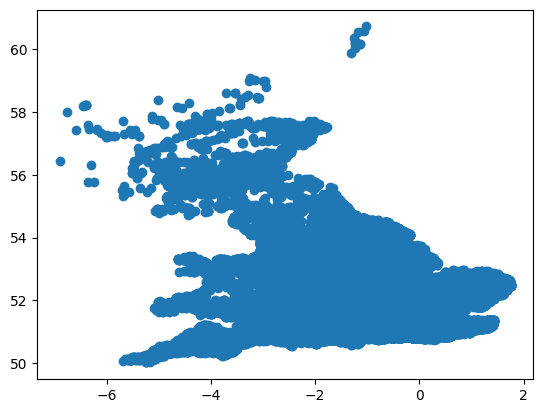

In [345]:
plt.scatter(df['Longitude'] ,df['Latitude'] )

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [346]:
Z = (relv_data_df - relv_data_df.mean())/relv_data_df.std()
Z.dropna(inplace=True)


In [347]:

pca= PCA(n_components=2).fit(Z)
redu_df = pca.transform(Z)
redu_df.shape

(52000, 2)

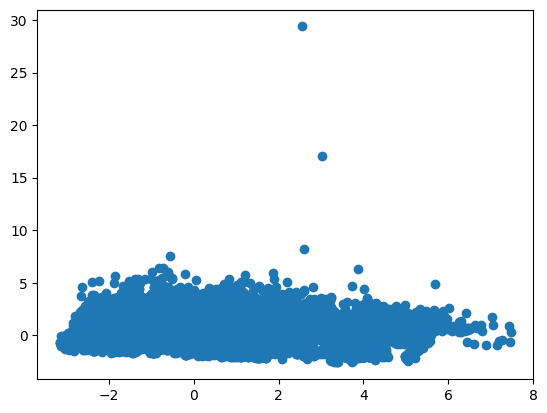

In [348]:
plt.scatter(redu_df[:, 0], redu_df[:, 1])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

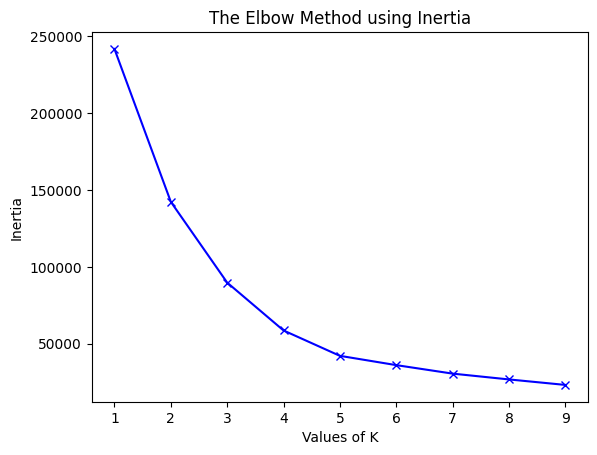

In [349]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(redu_df)
    kmeanModel.fit(redu_df)
    distortions.append(sum(np.min(cdist(redu_df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / redu_df.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(redu_df, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / redu_df.shape[0]
    mapping2[k] = kmeanModel.inertia_


plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [350]:
K_Mean = KMeans(n_clusters=5,init='k-means++', random_state=42)
KMeanModel = K_Mean.fit(redu_df)


db_1 = DBSCAN(eps=0.1, min_samples=10)
DBSCANModel = db_1.fit(redu_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [351]:
KM_silhouette_score = silhouette_score(redu_df, KMeanModel.labels_)
print(f'Silhouette Coefficient : %0.2f' %KM_silhouette_score)


Silhouette Coefficient : 0.52


In [312]:

DBSCAN_silhouette_score = silhouette_score(redu_df,
                                           DBSCANModel.labels_)
print(f'Silhouette Coefficient : %0.2f' %DBSCAN_silhouette_score)

Silhouette Coefficient : -0.43


## Plot the data points with their predicted cluster center

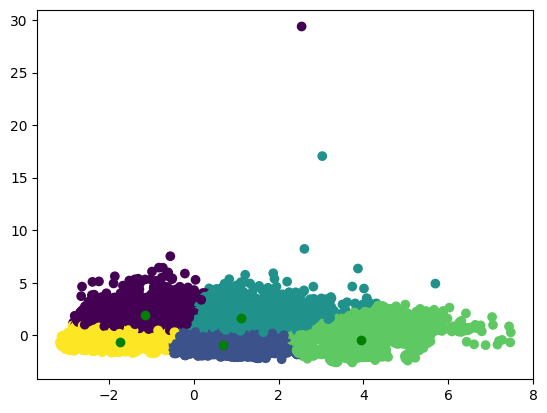

In [313]:
plt.scatter(redu_df[:, 0], redu_df[:, 1], c=KMeanModel.labels_)
plt.scatter(KMeanModel.cluster_centers_[:, 0],
            KMeanModel.cluster_centers_[:, 1], color='g')
plt.show()

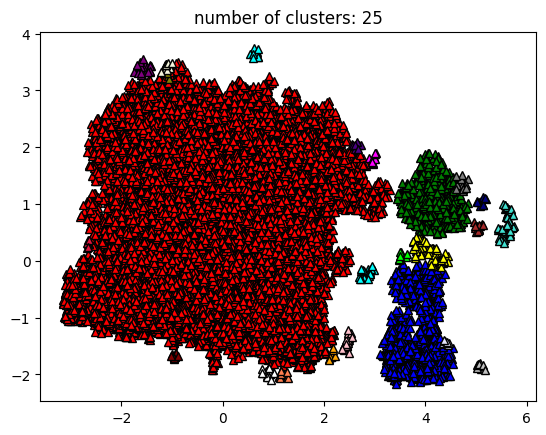

In [314]:
core_samples_mask = np.zeros_like(db_1.labels_, dtype=bool)
core_samples_mask[db_1.core_sample_indices_] = True
labels = db_1.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


unique_labels = set(labels)
colors = [ "Red", "Blue", "Green", "Yellow", "Purple", "Orange", "Pink", "Brown",
    "White", "Gray", "Cyan", "Lavender", "Turquoise",
           "Maroon", "Olive", "Coral",
    "Navy", "Beige", "Aqua", "Fuchsia", "Crimson"
    , "Indigo", "Silver", "Lime"
]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = redu_df[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '^', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = redu_df[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '^', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?